## I. Algorithm


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree


## II. Application to Data Set

In [14]:
coaster_data = pd.read_csv("../coaster_db.csv")

coaster_subset = coaster_data[['height_ft','speed_mph','Inversions_clean','Gforce_clean']]

clean_data = coaster_subset.dropna()

# Creating column for whether coaster has at least one inversion or not

clean_data['Inverted'] = clean_data['Inversions_clean'].apply(lambda x: 1 if x > 0 else 0)

print(f"There are {clean_data.shape[0]} roller coasters we have data for.")
print(f"There are {np.sum(clean_data['Inverted'])} inverted roller coasters.")
print(f"There are {clean_data.shape[0]-np.sum(clean_data['Inverted'])} non-inverted roller coasters.")

There are 70 roller coasters we have data for.
There are 36 inverted roller coasters.
There are 34 non-inverted roller coasters.


/var/folders/xh/x976_5p93059y1sn4ybh8ql40000gn/T/ipykernel_24654/2935719541.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Inverted'] = clean_data['Inversions_clean'].apply(lambda x: 1 if x > 0 else 0)


In [15]:
X = clean_data[['height_ft', 'speed_mph','Gforce_clean']]
y = clean_data['Inverted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, criterion='entropy')
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.89      0.89      0.89         9

    accuracy                           0.86        14
   macro avg       0.84      0.84      0.84        14
weighted avg       0.86      0.86      0.86        14



Looking at our confusion matrix, we can see that precision and recall were slightly higher for roller coasters with inversions than those without.

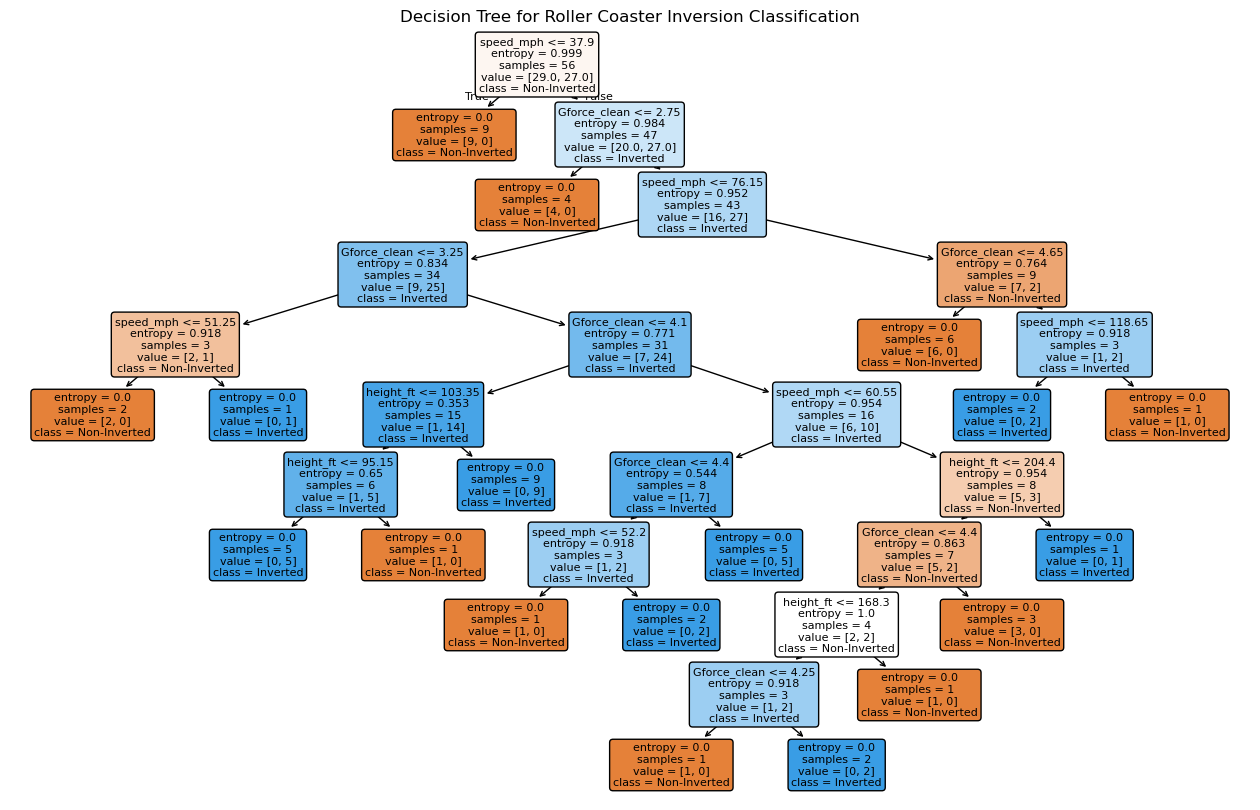

In [16]:
plt.figure(figsize=(16, 10))
plot_tree(clf, 
          feature_names=['height_ft', 'speed_mph','Gforce_clean'], 
          class_names=['Non-Inverted', 'Inverted'], 
          filled=True, 
          rounded=True)
plt.title("Decision Tree for Roller Coaster Inversion Classification")
plt.show()

Now, let's see how our accuracy changes as we increase the depth of the tree.

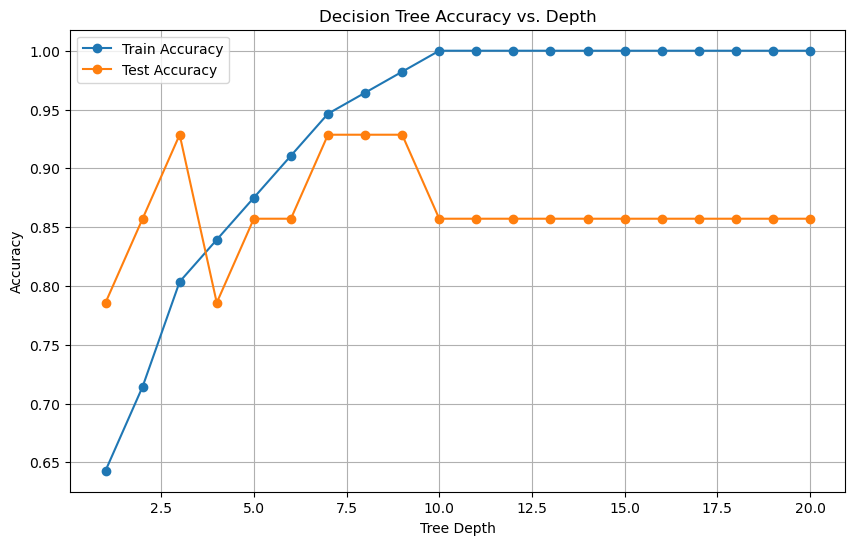

In [ ]:
depths = range(1, 21)
train_accuracies = []
test_accuracies = []

# Creating a decision tree per depth

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    # Adding accuracy
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Depth')
plt.legend()
plt.grid(True)
plt.show()


From this graph, we see that accuracy is an increasing function of tree depth for training accuracy. Once you reach a depth of 10, the accuracy on training data is 100%. However, for testing data, the accuracy fluctuates as tree depth increases. The highest accuracy actually is at a tree depth of 3, 7, 8, or 9. Once you reach 10, the accuracy stays constant at 85.7%.